In [1]:
import torch

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [3]:
import os
def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f'Found {len(dirnames)} directories and {len(filenames)} files in {dirpath}')

In [4]:
walk_through_dir(image_path)

Found 2 directories and 0 files in data\pizza_steak_sushi
Found 3 directories and 0 files in data\pizza_steak_sushi\test
Found 0 directories and 25 files in data\pizza_steak_sushi\test\pizza
Found 0 directories and 19 files in data\pizza_steak_sushi\test\steak
Found 0 directories and 31 files in data\pizza_steak_sushi\test\sushi
Found 3 directories and 0 files in data\pizza_steak_sushi\train
Found 0 directories and 78 files in data\pizza_steak_sushi\train\pizza
Found 0 directories and 75 files in data\pizza_steak_sushi\train\steak
Found 0 directories and 72 files in data\pizza_steak_sushi\train\sushi


In [5]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


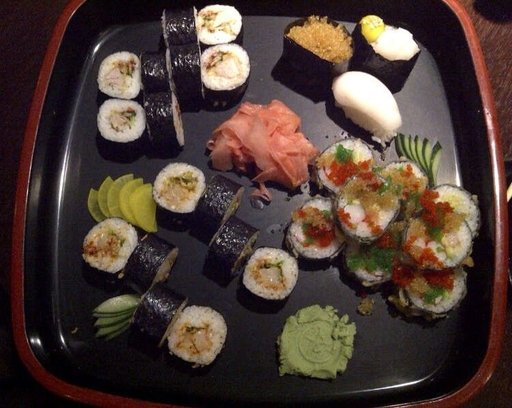

In [6]:
from PIL import Image
import random

random.seed(42)
file_names = list(image_path.glob('*/*/*.jpg'))
random_image_path = random.choice(file_names)
img = Image.open(random_image_path)
image_class = random_image_path.parent.stem
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 407.5, -0.5)

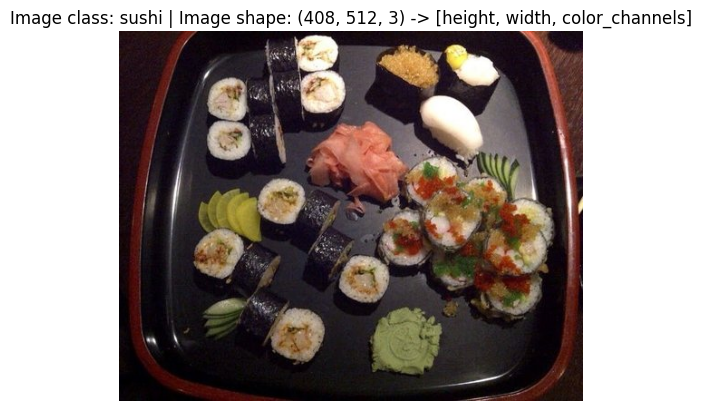

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img_array = np.asarray(img)
plt.imshow(img_array)
plt.title(f"Image class: {image_class} | Image shape: {img_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [8]:
from torchvision.transforms import ToTensor, Resize, RandomHorizontalFlip, Compose

transformation = Compose(
    [Resize(size=(64, 64)),
    RandomHorizontalFlip(p=0.5),
    ToTensor()]
)

In [9]:
def visualisation_of_transform(img_paths, transformation:Compose, n=3):

    random_img_paths = random.sample(img_paths, k=n)
    for img_path in random_img_paths:
        with Image.open(img_path) as img: 
            fig, ax = plt.subplots(1, 2)
            #print(np.asarray(img).shape)
            ax[0].imshow(np.asarray(img))
            ax[0].set_title('original')
            ax[0].axis('off')

            transformed_img = transformation(img).permute(1, 2, 0)
            #print(transformed_img.shape)
            ax[1].imshow(np.asarray(transformed_img))
            ax[1].set_title('transformed')
            ax[1].axis('off')            

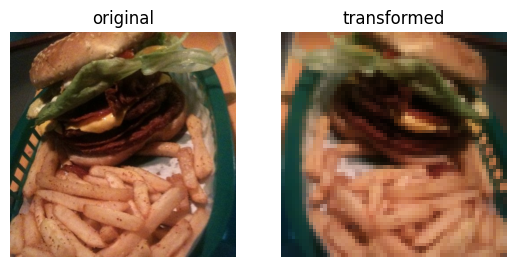

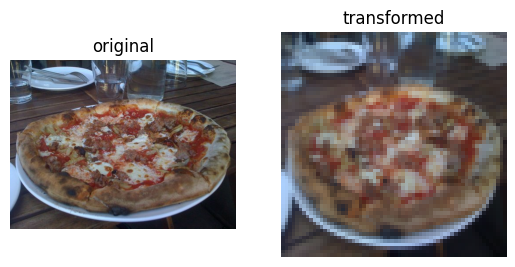

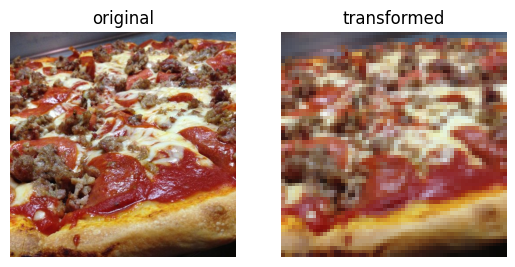

In [10]:
visualisation_of_transform(file_names, transformation)

In [11]:
from torchvision.datasets import ImageFolder

In [12]:
train_data = ImageFolder(root=train_dir,
                         transform=transformation)
test_data = ImageFolder(root=test_dir,
                         transform=transformation)
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [13]:
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [14]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Text(0.5, 1.0, 'pizza')

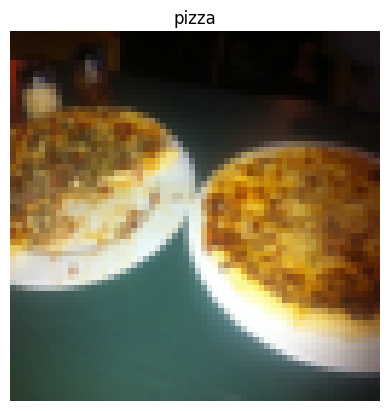

In [17]:
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.title(class_names[label])

In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=False)

In [19]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [20]:
target_directory = train_dir


In [21]:
class_names_found = [entry.name for entry in list(os.scandir(target_directory))]

In [22]:
def find_classes(directory:str) -> Tuple[List, Dict[str, int]]:
    class_names_found = [entry.name for entry in list(os.scandir(directory))]
    if not class_names_found:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    class_name_dict = {class_names_found: i for i, class_names_found in enumerate(class_names_found)}
    return class_names_found, class_name_dict

find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [23]:
from torch.utils.data import Dataset

class CutomImageFolder(Dataset):
    def __init__(self, dir:str, transform=None):
        super().__init__()
        self.image_paths = list(pathlib.Path(dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.classes_to_idx = find_classes(dir)

    def load_image(self, index) -> Image.Image:
        path = self.image_paths[index]
        return Image.open(path)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.image_paths[index].parent.name
        class_idx = self.classes_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return ToTensor(img), class_idx

In [24]:
train_transform = Compose([
    Resize(size=(64, 64)),
    RandomHorizontalFlip(p=0.5),
    ToTensor()
])
test_transform = Compose([
    Resize(size=(64, 64)),
    ToTensor()
])

In [25]:
train_data_custom = CutomImageFolder(
    train_dir,
    transform=train_transform
)
test_data_custom = CutomImageFolder(
    test_dir,
    transform=test_transform
)

In [26]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [27]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [28]:
train_data_custom.classes_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [29]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.classes_to_idx == train_data.class_to_idx)

True
True
True


In [30]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

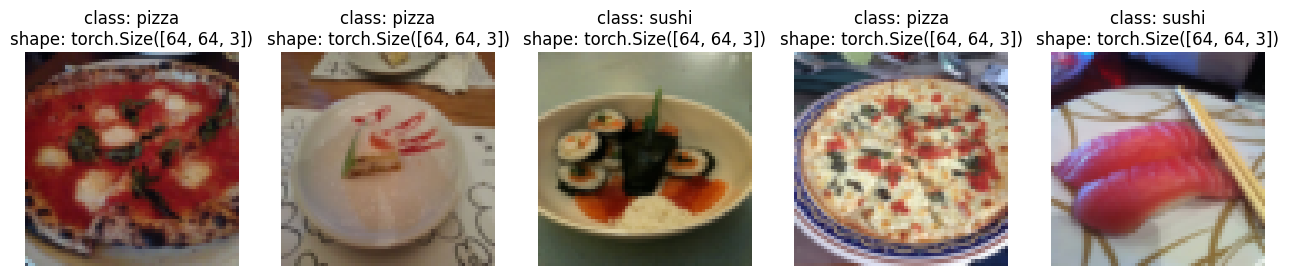

In [31]:
display_random_images(dataset=train_data,
                      classes=class_names,
                      n = 5)

In [32]:
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=1,
                                     shuffle=True,
                                     num_workers=0)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=1,
                                     shuffle=False,
                                     num_workers=0)

In [33]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [34]:
train_transform = Compose([
    Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    ToTensor()
])

test_transform = Compose([
    Resize(size=(224, 224)),
    ToTensor()
])

In [35]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

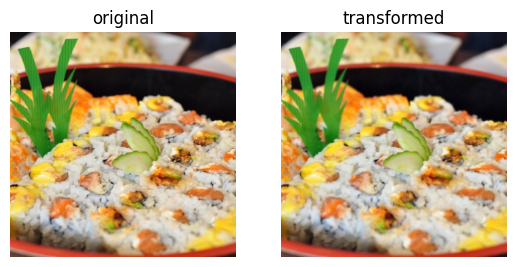

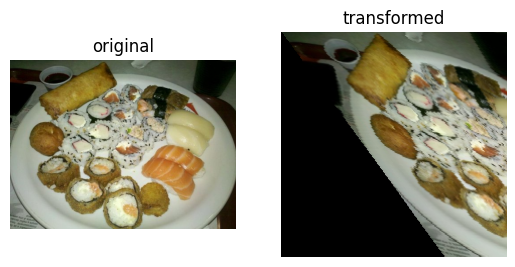

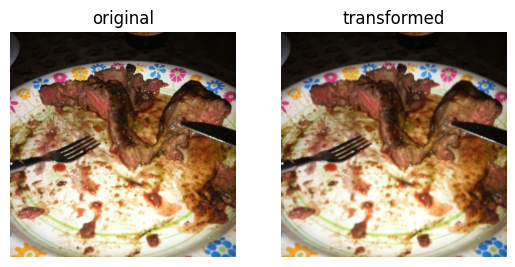

In [36]:
visualisation_of_transform(image_path_list, transformation=train_transform)

In [37]:
simple_transform = Compose([
    Resize(size=(64, 64)),
    ToTensor()
])

In [38]:
train_data_simple = ImageFolder(train_dir, transform=simple_transform)
test_data_simple = ImageFolder(test_dir, transform=simple_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

Creating DataLoader's with batch size 32 and 8 workers.


In [39]:
from torch import nn

class TinyVGG(nn.Module):

    def __init__(self, input_shape:int, hidden_units:int, output_shape:int,  *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        #print(x.shape)
        return x


return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- быстрее на GPU

In [40]:
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes))
model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [41]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single)
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0079,  0.0084, -0.0111]])

Output prediction probabilities:
tensor([[0.3354, 0.3356, 0.3291]])

Output prediction label:
tensor([1])

Actual label:
0


In [42]:
pred_logits = model_0(img_batch[0].unsqueeze(dim=0))
pred_probs = torch.softmax(pred_logits, dim=1)
pred_probs

tensor([[0.3354, 0.3356, 0.3291]], grad_fn=<SoftmaxBackward0>)

In [43]:
label_batch[0].item()

0

In [44]:
from torchinfo import summary

summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [45]:
import torch.utils
import torch.utils.data


def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               optimizer:torch.optim.Optimizer,
               loss_fn:torch.nn.Module):
    model.train()
    train_loss, train_acc = 0, 0

    for X, y in dataloader:
        pred_logits = model(X)

        train_loss_batch = loss_fn(pred_logits, y)
        train_loss += train_loss_batch

        y_pred_class = torch.argmax(pred_logits, dim=1)

        optimizer.zero_grad()
        train_loss_batch.backward()
        optimizer.step()

        train_acc += (y_pred_class == y).sum().item()/len(y)
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [46]:

def test_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            pred_logits = model(X)

            test_loss_batch = loss_fn(pred_logits, y)
            test_loss += test_loss_batch

            y_pred_class = torch.argmax(pred_logits, dim=1)

            test_acc += (y_pred_class == y).sum().item()/len(y)
    
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    return test_loss, test_acc

In [47]:
from tqdm.auto import tqdm

def train(model:nn.Module,
          test_dataloader:torch.utils.data.DataLoader,
          train_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs: int = 5):
    results = {
        'train_loss':[],
        'train_acc':[],
        'test_loss':[],
        'test_acc':[]
    }
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model = model,
                                           dataloader=test_dataloader,
                                           loss_fn=loss_fn)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results['train_loss'].append(train_loss.item())
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss.item())
        results['test_acc'].append(test_acc)
    return results
        

In [48]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=3)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.01)

model_0_results = train(model=model_0,
                        test_dataloader=test_dataloader_simple,
                        train_dataloader=train_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2180 | train_acc: 0.2500 | test_loss: 1.1973 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0989 | train_acc: 0.4141 | test_loss: 1.1055 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1014 | train_acc: 0.2930 | test_loss: 1.1091 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0940 | train_acc: 0.4141 | test_loss: 1.1126 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0996 | train_acc: 0.2930 | test_loss: 1.1190 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0933 | train_acc: 0.4141 | test_loss: 1.1236 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.1094 | train_acc: 0.2930 | test_loss: 1.1272 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1072 | train_acc: 0.2930 | test_loss: 1.1206 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1032 | train_acc: 0.2930 | test_loss: 1.1106 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.0993 | train_acc: 0.2930 | test_loss: 1.1002 | test_acc: 0.1979
Epoch: 11 | train_loss: 1.0961 | train_acc: 0.4023 | test_loss: 1.0907 | test_acc: 0.5417
Epoch: 12 | train_l

In [49]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

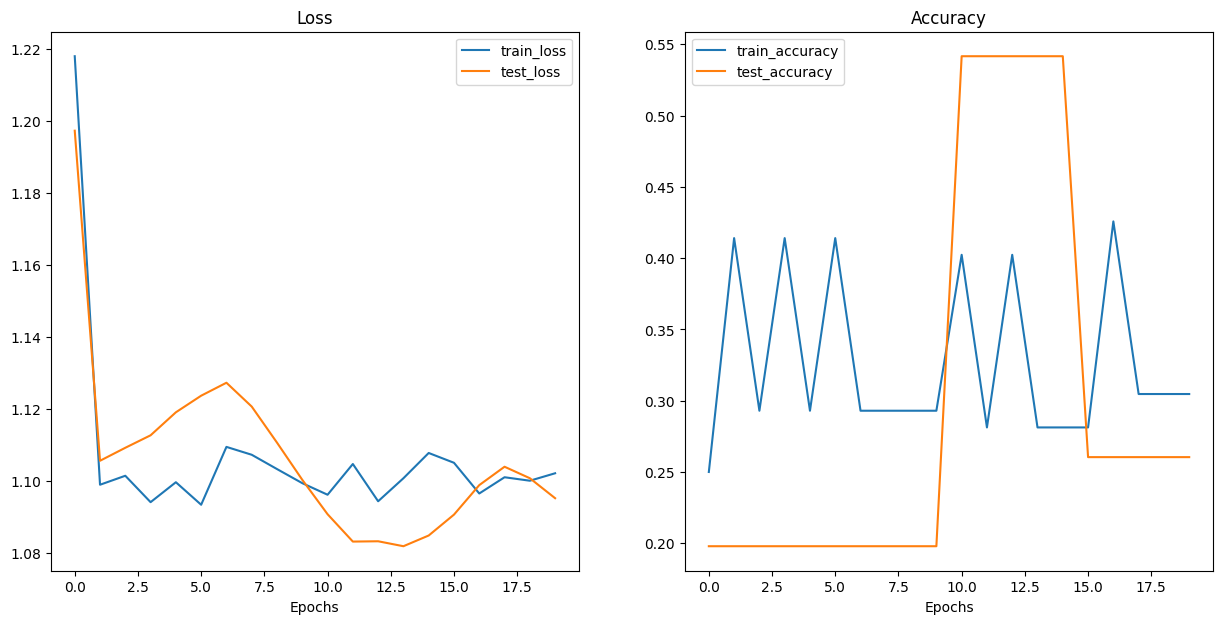

In [50]:
plot_loss_curves(model_0_results)

In [91]:
train_transform_trivial_augment = Compose(
    [Resize(size = (64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    ToTensor()]
)
test_transform = Compose(
    [Resize(size=(64, 64)),
    ToTensor()]
)

In [92]:
train_data_augmented = ImageFolder(root=train_dir, transform=train_transform_trivial_augment)
test_data_simple = ImageFolder(root=test_dir, transform=test_transform)


In [93]:
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        num_workers=NUM_WORKERS)

In [94]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes))

In [96]:
NUM_EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

model_1_results = train(model=model_1,
                        test_dataloader=test_dataloader_simple,
                        train_dataloader=train_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1601 | train_acc: 0.4180 | test_loss: 1.1082 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0963 | train_acc: 0.4023 | test_loss: 1.1187 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1064 | train_acc: 0.2930 | test_loss: 1.1182 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.1050 | train_acc: 0.2930 | test_loss: 1.1134 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.1040 | train_acc: 0.2930 | test_loss: 1.1120 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0961 | train_acc: 0.4141 | test_loss: 1.1057 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.0945 | train_acc: 0.4141 | test_loss: 1.1079 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1025 | train_acc: 0.2930 | test_loss: 1.1129 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1044 | train_acc: 0.2930 | test_loss: 1.1145 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.1029 | train_acc: 0.2930 | test_loss: 1.1090 | test_acc: 0.1979
Epoch: 11 | train_loss: 1.0999 | train_acc: 0.2930 | test_loss: 1.1012 | test_acc: 0.1979
Epoch: 12 | train_l

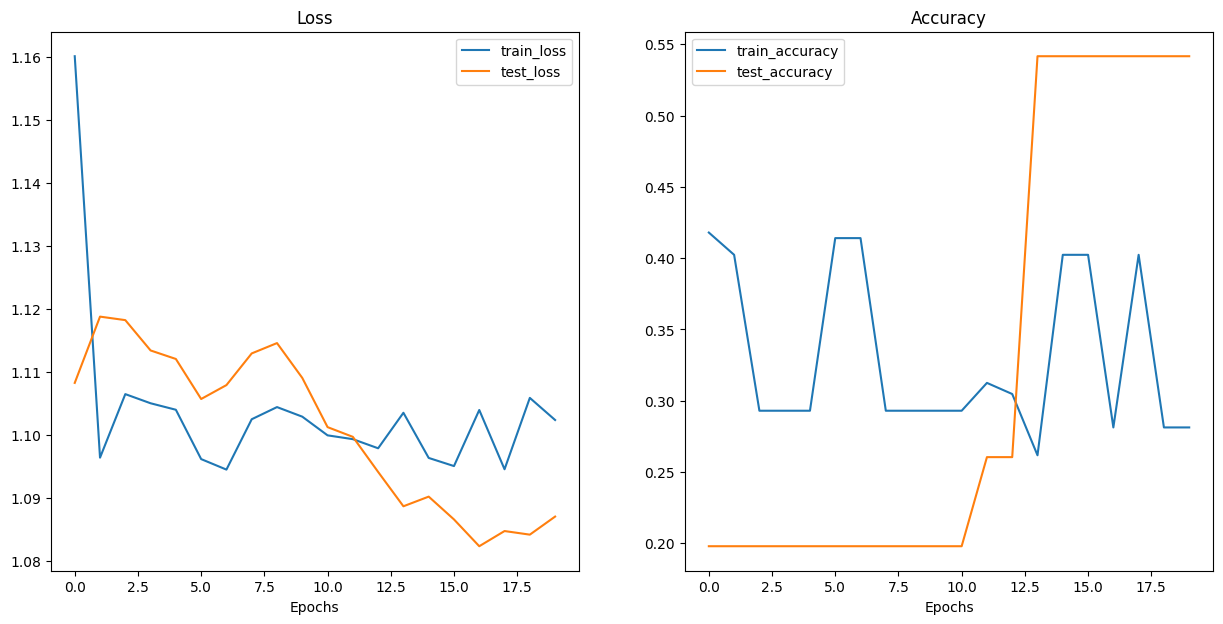

In [97]:
plot_loss_curves(model_1_results)

In [98]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001FE64F2CF70>
Traceback (most recent call last):
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\multiprocessing\process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\multiprocessing\popen_spawn_win32.py", line 108, in wait
    res = _winapi.WaitForSingleObject(int(self._handle), msecs)
KeyboardInterrupt: 
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001FE64F2CF70>
Traceback (most recent call last):
  File "c:\Users\

,train_loss,train_acc,test_loss,test_acc
0,1.218000,0.250000,1.197295,0.197917
1,1.098858,0.414062,1.105525,0.197917
2,1.101355,0.292969,1.109133,0.197917
3,1.094013,0.414062,1.112604,0.197917
4,1.099557,0.292969,1.118999,0.197917
5,1.093295,0.414062,1.123615,0.197917
6,1.109380,0.292969,1.127218,0.197917
7,1.107194,0.292969,1.120591,0.197917
8,1.103218,0.292969,1.110565,0.197917
9,1.099295,0.292969,1.100226,0.197917


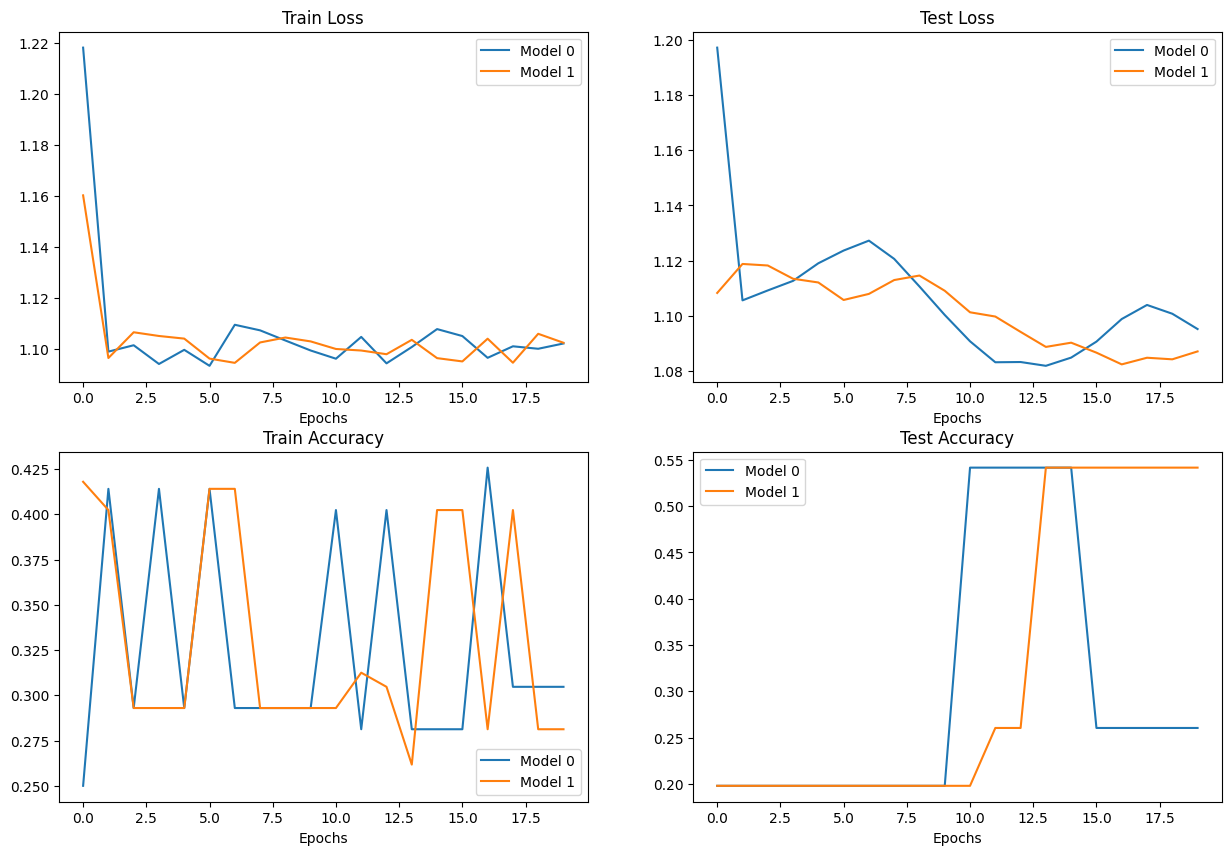

In [100]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [101]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [102]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [106]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image /= 255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

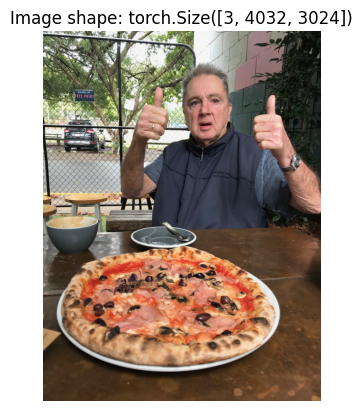

In [107]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [110]:
custom_image_transform = Compose([
    Resize(size=(64,64)),
    #ToTensor()
])

custom_image_transformed = custom_image_transform(custom_image)
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [111]:
custom_image_transformed = custom_image_transformed.unsqueeze(dim=0)
custom_image_transformed.shape

torch.Size([1, 3, 64, 64])

In [113]:
model_1.eval()
with torch.inference_mode():
    res = model_1(custom_image_transformed)

res

tensor([[-0.0340, -0.0288,  0.0270]])

In [116]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        ):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    

    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image)
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

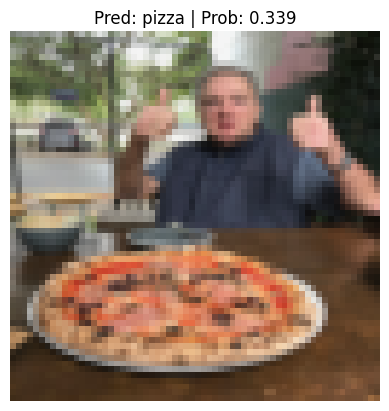

In [119]:
# Pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
)